In [1]:
# Import libraries

import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # For plotting

import sys, os                  # For adding the RaschPy library to the path


sys.path.append(os.path.abspath("C:/Users/brf337/Desktop/Rasch package/Rasch-models-in-Python-and-R/Python code"))
import RaschFunctions as rf # Loading Rasch functions library


sys.path.append(os.path.abspath("C:/Users/brf337/Desktop/Rasch package/RaschPy/RaschPy"))
import __init__ as Rasch # Loading the RaschPy library

In [2]:
# Read the data
OHS = pd.read_csv("C:/Users/brf337/Desktop/Rasch package/OHS.csv", delimiter = ";")

# Remove rows with missing values
OHS = OHS.dropna()

# Dichotomize the data
OHS_dich = rf.dichotomize_data(OHS, 2, list(OHS.columns))

We carry out a similar analysis in Python using the RaschPy package. We use the same binary data as in the previous Rasch analysis. The first step is to create an object of a class SLM:

In [12]:
OHS_RaschPy = Rasch.SLM(OHS_dich)
OHS_RaschPy.item_stats_df(full = False, disc = True, zstd = True)

To retrieve the estimates we run the following code:

In [13]:
OHS_RaschPy.item_stats

,Estimate,SE,Count,Facility,Infit MS,Infit Z,Outfit MS,Outfit Z,Discrim
1,3.317,0.524,206,0.039,0.737,-1.080,0.570,-0.466,1.127
2,-2.843,0.235,206,0.752,0.842,-1.365,0.721,-0.703,1.167
3,-0.558,0.187,206,0.432,0.718,-3.613,0.575,-3.834,1.501
4,-1.852,0.210,206,0.646,0.838,-1.932,1.038,0.242,1.224
5,-1.937,0.227,206,0.631,0.769,-2.805,0.566,-2.170,1.400
6,-0.843,0.196,206,0.471,1.090,1.071,1.107,0.791,0.831
7,1.324,0.205,206,0.214,0.682,-2.900,0.478,-2.457,1.348
8,0.381,0.188,206,0.286,0.867,-1.372,0.802,-1.288,1.183
9,-0.265,0.196,206,0.383,0.909,-1.019,0.950,-0.344,1.136
10,0.270,0.207,206,0.286,1.175,1.733,1.337,2.065,0.732


This also provides the item fit statistics Infit MS and Outfit MS. We can finally retrieve the person stats:

In [5]:
OHS_RaschPy.person_stats_df()
OHS_RaschPy.person_stats

OHS_RaschPyPersonSummaryDataFrame = OHS_RaschPy.person_stats[['Estimate', 'Score', 'CSEM']].drop_duplicates().sort_values(by='Score').reset_index(drop=True)
OHS_RaschPyPersonSummaryDataFrame

,Estimate,Score,CSEM
0,-3.327,0,NaN
1,-2.984,1,1.015
2,-2.238,2,0.862
3,-1.612,3,0.784
4,-1.062,4,0.740
5,-0.558,5,0.718
6,-0.074,6,0.714
7,0.415,7,0.727
8,0.940,8,0.762
9,1.543,9,0.824


findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.


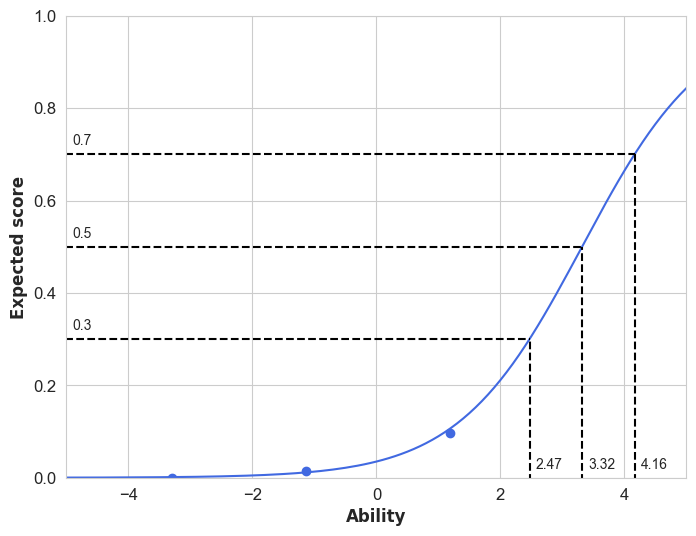

In [6]:
OHS_RaschPy.icc("1", obs = True, score_labels= True, score_lines = [0.3, 0.5, 0.7], no_of_classes=3)

# Polytomous

In [7]:
OHS_PCM_RaschPy = Rasch.PCM(OHS)
OHS_PCM_RaschPy.item_stats_df(full = False)

C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:2600: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i in range(self.max_score_vector[item_1])]
C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:2599: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for j in range(self.max_score_vector[item_2])]
C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:549: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il

In [8]:
OHS_PCM_RaschPy.item_stats

,Estimate,SE,Count,Facility,Infit MS,Outfit MS,Disordered
1,1.938,0.221,206,0.221,0.816,0.901,True
2,-1.717,0.110,206,0.774,0.866,0.868,
3,-0.794,0.097,206,0.609,0.803,0.796,
4,-1.202,0.148,206,0.720,0.967,0.992,
5,-1.172,0.121,206,0.722,0.805,0.796,
6,-0.619,0.110,206,0.592,1.159,1.192,
7,0.180,0.138,206,0.472,0.813,0.786,
8,0.111,0.125,206,0.485,0.909,0.946,
9,0.638,0.109,206,0.477,1.044,1.086,
10,0.416,0.092,206,0.482,1.425,1.567,True


findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.


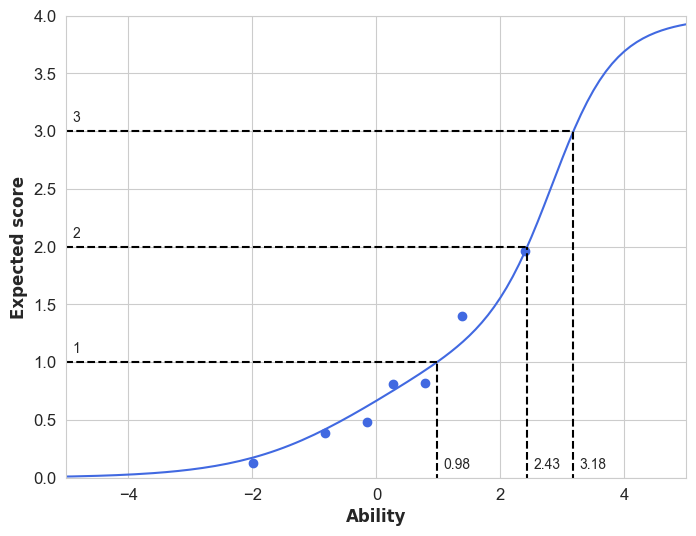

In [9]:
OHS_PCM_RaschPy.icc("1", obs = True, 
              score_labels= True, 
              score_lines = [1, 2, 3], 
              no_of_classes=7)